In [13]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [1]:
import pandas as pd
ds_mycars=pd.read_csv("mycars.csv", engine="python")
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [2]:
ds_mycars.describe().round(3)

,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


In [3]:
df=ds_mycars[['model', 'mpg']]
df.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

In [4]:
df=ds_mycars[['manufacturer', 'mpg']]
df.groupby('manufacturer').describe()

mpg                                                    
             count       mean       std   min   25%   50%    75%   max
manufacturer                                                          
audi          18.0  17.611111  1.974511  15.0  16.0  17.5  18.75  21.0
chevrolet     19.0  15.000000  2.924988  11.0  13.5  15.0  16.50  22.0
dodge         37.0  13.135135  2.485091   9.0  11.0  13.0  15.00  18.0
ford          25.0  14.000000  1.914854  11.0  13.0  14.0  15.00  18.0
honda          9.0  24.444444  1.943651  21.0  24.0  24.0  25.00  28.0
hyundai       14.0  18.642857  1.499084  16.0  18.0  18.5  19.75  21.0
jeep           8.0  13.500000  2.507133   9.0  12.5  14.0  15.00  17.0
land rover     4.0  11.500000  0.577350  11.0  11.0  11.5  12.00  12.0
lincoln        3.0  11.333333  0.577350  11.0  11.0  11.0  11.50  12.0
mercury        4.0  13.250000  0.500000  13.0  13.0  13.0  13.25  14.0
nissan        13.0  18.076923  3.426892  12.0  15.0  19.0  19.00  23.0
pontiac        5.0  17.000000  1.000000  16.0  16.0  17.0  18.00  18.0
subaru        14.0  19.285714  0.913874  18.0  19.0  19.0  20.00  21.0
toyota        34.0  18.529412  4.046961  11.0  15.0  18.0  21.00  28.0
volkswagen    27.0  20.925926  4.556702  16.0  18.5  21.0  21.00  35.0

In [5]:
df=ds_mycars[['automatic', 'mpg']]
df.groupby('automatic').describe()

mpg                                                  
           count       mean       std  min   25%   50%   75%   max
automatic                                                         
auto       157.0  15.968153  3.848777  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675325  4.488118  9.0  15.0  18.0  21.0  35.0

In [36]:
# 한글 설치
import matplotlib
import matplotlib.font_manager as fm
font_location='/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name=fm.FontProperties(fname=font_location)
matplotlib.rc('font', family=font_name)

ValueError: Key font.family: <matplotlib.font_manager.FontProperties object at 0x7f75c6d69dd0> must be of type: string or non-dictionary iterable

In [16]:
# 그래프에서 음수 표시
import matplotlib
matplotlib.rc('axes', unicode_minus=False)

In [30]:
# 데이터 가져오기
import pandas as pd
ds_EXH_QC1=pd.read_csv("EXH_QC1.csv", engine='python')
df=ds_EXH_QC1[['Flaws', 'Period']]
ds_EXH_QC1.head()


,Flaws,Period,Strength,Baking Time,Cabbage weight
0,Scratch,Day,37.6,0.798922,3.6
1,Scratch,Day,38.6,0.849020,2.9
2,Peel,Day,37.2,0.816163,2.8
3,Peel,Day,36.4,0.758266,2.6
4,Smudge,Day,38.6,0.815894,3.4


In [39]:
import numpy as np
# Flaws변수 Count: value_count, 순서대로 정렬: sort_index
count=df['Flaws'].value_counts().sort_index()

# CumCnt 계산: cumsum
cumcnt=np.cumsum(count)
#Percent 계산: 직접
percent=count/sum(count)*100
# CumPct 계산: cumsum
cumpct=np.cumsum(percent)


In [40]:
print(cumcnt)

Other       6
Peel       21
Scratch    34
Smudge     40
Name: Flaws, dtype: int64


In [43]:
print(count)

Other       6
Peel       15
Scratch    13
Smudge      6
Name: Flaws, dtype: int64


In [45]:
print(sum(count))

40


In [20]:
print(percent)

Other      15.0
Peel       37.5
Scratch    32.5
Smudge     15.0
Name: Flaws, dtype: float64


In [46]:
print(cumpct)

Other       15.0
Peel        52.5
Scratch     85.0
Smudge     100.0
Name: Flaws, dtype: float64


In [ ]:
count_data2=pd.DataFrame({'Count': count2, 'CumCnt': cumcnt2, 'Percent': percent2, 'CumPct': cumpct2})
count_data2.columns.name='Period'
count_data2

In [49]:
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
plt.rc('font', family='NanumGothic')

cp: 대상 '/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/' 은 디렉터리가 아님


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fprop=fm.FontProperties(fname=font_location)
0

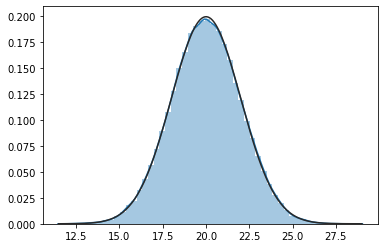

In [39]:
np.random.seed(seed=1234)
normal=np.random.normal(20,2,100000)
sns.distplot(normal, fit=stats.norm, kde=True) # 정규분포를 피팅시켜서 kernel density도 같이 그려라 진짜 정규분포와 랜덤 추출 두 개 그려짐

In [47]:
mu=115
sigma=20
x=135
prob=stats.norm.cdf(x, mu, sigma)
print("{0}분 이상 걸리는 A/S 작업 비율: {1:.1f}%".format(x, (1-prob)*100))

135분 이상 걸리는 A/S 작업 비율: 15.9%


In [48]:
mu=175
sigma=5
x=180
prob=stats.norm.cdf(x, mu, sigma)
print("{0}cm 이상인 남성 비율: {1:.1f}%".format(x, (1-prob)*100))

180cm 이상인 남성 비율: 15.9%


In [49]:
count_data=pd.DataFrame({'Count': count, 'CumCnt': cumcnt, 'Percent': percent, 'CumPct': cumpct})
count_data.columns.name='Flaws'
count_data

Flaws,Count,CumCnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


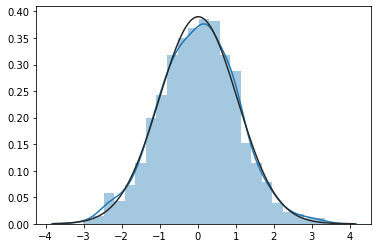

In [7]:
import seaborn as sns
from scipy import stats
np.random.seed(1234)
t_df29=np.random.standard_t(df=29, size=1000)
sns.distplot(t_df29, fit=stats.norm, kde=True)

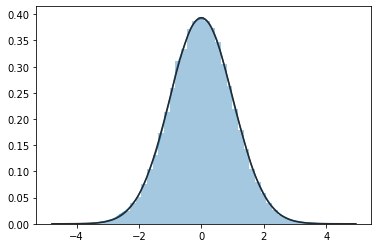

In [11]:
np.random.seed(1234)
t_df29=np.random.standard_t(df=100, size=100000)
sns.distplot(t_df29, fit=stats.norm, kde=True)

In [12]:
t=1.53
df=5
prob=stats.t.cdf(t,df)
print("P(T<=F): {:.3f}".format(prob))

P(T<=F): 0.907


In [13]:
t=2.0
df=100
prob=stats.t.cdf(t,df)
print("P(T<=F): {:.3f}".format(prob))

P(T<=F): 0.976


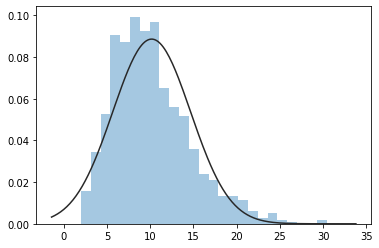

In [14]:
np.random.seed(seed=1234)
chisq_df10=np.random.chisquare(df=10, size=1000)
sns.distplot(chisq_df10, fit=stats.norm, kde=False)

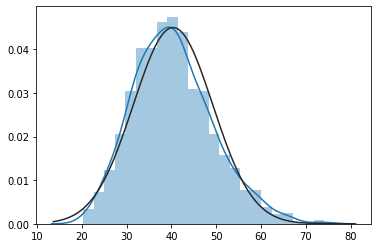

In [16]:
np.random.seed(seed=1234)
chisq_df10=np.random.chisquare(df=40, size=1000)
sns.distplot(chisq_df10, fit=stats.norm, kde=True)

In [22]:
chisq=10
df=30
prob=stats.chi2.cdf(chisq, df)
print("P(X<={0}): {1:.4f}".format(chisq, prob))

P(X<=10): 0.0002


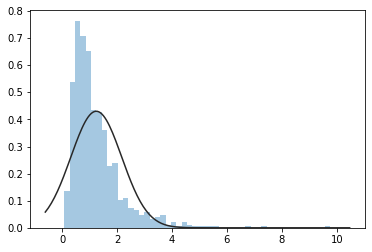

In [23]:
np.random.seed(seed=1234)
F_df10_10=np.random.f(dfnum=10, dfden=10, size=1000)
sns.distplot(F_df10_10, fit=stats.norm, kde=False)

In [24]:
f=2.0
dfnum=15
dfden=15
prob=stats.f.cdf(x=f, dfn=dfnum, dfd=dfden)
print("P(X<=F): {:.3f}".format(prob))

P(X<=F): 0.904


In [25]:
f=1.5
dfnum=10
dfden=100
prob=stats.f.cdf(x=f, dfn=dfnum, dfd=dfden)
print("P(X<=F): {:.3f}".format(prob))

P(X<=F): 0.850


In [27]:
x=1500
alpha=2.2
beta=1200
prob=stats.weibull_min.cdf(x, alpha, scale=beta)
print("P(X>=x): {:.3f}".format(1-prob))

P(X>=x): 0.195


In [ ]:
# 모집단의 표준 편차를 모르기 때문에 t분포를 가장 많이 쓴다.
정규분포와 t분포는 평균 추정
카이제곱분포는 분산 추정
f분포는 분산. 회귀 분석에서 모형의 적합성 검정에 쓴다.
와이블분포는 설비의 신뢰성, 수명 검정. 단 알파와 베타를 찾기 어려우므로 쓰기 어려움

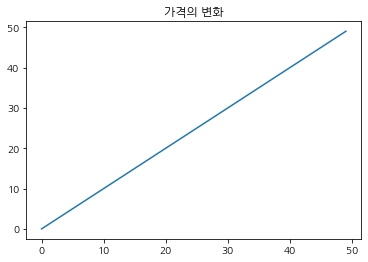

In [29]:
import matplotlib

import matplotlib.font_manager as fm

 

font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()

matplotlib.rc('font',family = font_name)

 

plt.title('가격의 변화')

plt.plot(range(50))

plt.show()